In [1]:
from ase.io import read, write
import numpy as np
from matplotlib import pyplot as plt
import ase
from mace.calculators.mace import MACECalculator
from matplotlib.cm import get_cmap
from matplotlib import rc
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from PIL import Image

In [2]:
def d1_d2(config=ase.Atoms, n=int, l=int, c=int):
    pos = config.get_positions()
    d1 = np.linalg.norm(pos[c,:] - pos[n,:])
    d2 = np.linalg.norm(pos[c,:] - pos[l,:])
    return d1, d2

In [3]:
energies = np.zeros((2,40))
mp2_energies = np.zeros((2,40))
mp2_energies[0,:] = np.array([at.info['mp2_energy'] for at in read('../nofrozencore/1-images-train60-highest-dis-std-0.02-2-models/iter0/neb-mp2.xyz', ':')])
mp2_energies[1,:] = np.array([at.info['mp2_energy'] for at in read('../nofrozencore/1-images-train60-highest-dis-std-0.02-2-models/iter15/neb-mp2.xyz', ':')])
for i, iter in enumerate([0, 15]):
    model = f'../nofrozencore/1-images-train60-highest-dis-std-0.02-2-models/iter{iter}/MACE_*_swa.model'
    calc = MACECalculator(model_paths=model, device='cpu', default_dtype='float64')
    neb = read(f'../nofrozencore/1-images-train60-highest-dis-std-0.02-2-models/iter{iter}/neb-mp2.xyz', ":")
    for j,atoms in enumerate(neb):
        calc.calculate(atoms=atoms)
        energies[i,j] = calc.results['energy']

/Users/domantas/miniconda3/envs/mace/lib/python3.11/site-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/Users/domantas/miniconda3/envs/mace/lib/python3.11/site-packages/torch/overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
/Users/domantas/miniconda3/envs/mace/lib/python3.11/site-packages/torch/overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
/Users/domantas/miniconda3/envs/mace/lib/python3.11/site-packages/torch/overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'
  torch.has_mkldnn,


Running committee mace with 2 models
using head Default out of ['Default']
Running committee mace with 2 models
using head Default out of ['Default']


In [4]:
#mp2_neb = np.array([at.get_potential_energy() for at in read('../ab-initio-neb/neb-run-from-neb1-lowest-im/neb-mp2.xyz', '1:-1')])
mp2_neb = np.array([at.get_potential_energy() for at in read('../../../revision/4h20-ethyl-f-cl/ab_initio_neb/neb-mp2.xyz', '1:-1')])
mp2_neb -= np.min(mp2_neb)

d1d2m = np.array([list(d1_d2(atoms,  n=3, l=4, c=0)) for atoms in read('../../../revision/4h20-ethyl-f-cl/ab_initio_neb/neb-mp2.xyz', '1:-1')])
d1m = d1d2m[:,0]
d2m = d1d2m[:,1]

/var/folders/c6/4ykf__mj12q0hn4ym6wyxhg40000gn/T/ipykernel_81842/2796858193.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')
/var/folders/c6/4ykf__mj12q0hn4ym6wyxhg40000gn/T/ipykernel_81842/2796858193.py:78: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter((d2-d1)[display_mp2], (mp2_energies[i,:] - np.min(mp2_energies[i,:]))[display_mp2], c=cmap(cm[i]), marker='D', s=16, zorder=1, label=f'MP2 of iter {iter[i]}')


[[-7.01542631e-05  3.34690430e-01  3.32266464e-01  3.32755241e-01
   3.36963231e-01  3.35482674e-01  3.39122887e-01  3.48173955e-01
   3.53607415e-01  3.60781746e-01  3.74821475e-01  3.93869130e-01
   4.98873913e-01  6.36056548e-01  7.23721902e-01  9.19357761e-01
   1.01671079e+00  1.43065167e+00  1.47408354e+01  1.35022539e+01
   1.02250979e+01  9.98775754e+00  9.10266004e+00  1.24542343e+01
   8.61120261e+00  6.23818937e+00  7.33801991e-01  2.16665475e-01
   1.38062626e-01  1.17037452e-01  3.71952425e-02 -1.78801052e-02
  -1.56052386e-02 -1.56491516e-02 -1.46007893e-02 -1.17582093e-02
  -5.65184100e-03  7.36747461e-03  2.34974668e-02 -5.38241005e-04]
 [-7.01542631e-05 -1.18554869e-02 -1.17190625e-02 -1.06317226e-02
  -1.43568732e-02 -1.47360149e-02 -1.49861636e-02 -1.48467373e-02
  -1.28345675e-02 -1.24013714e-02 -1.15968014e-02 -1.03131420e-02
  -7.23934769e-03 -2.47606520e-03 -6.07639537e-03  1.31803013e-03
   7.40436573e-03  6.31832018e-03 -7.53486580e-04 -6.04881250e-03
  -2.3654

/var/folders/c6/4ykf__mj12q0hn4ym6wyxhg40000gn/T/ipykernel_81842/2796858193.py:160: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


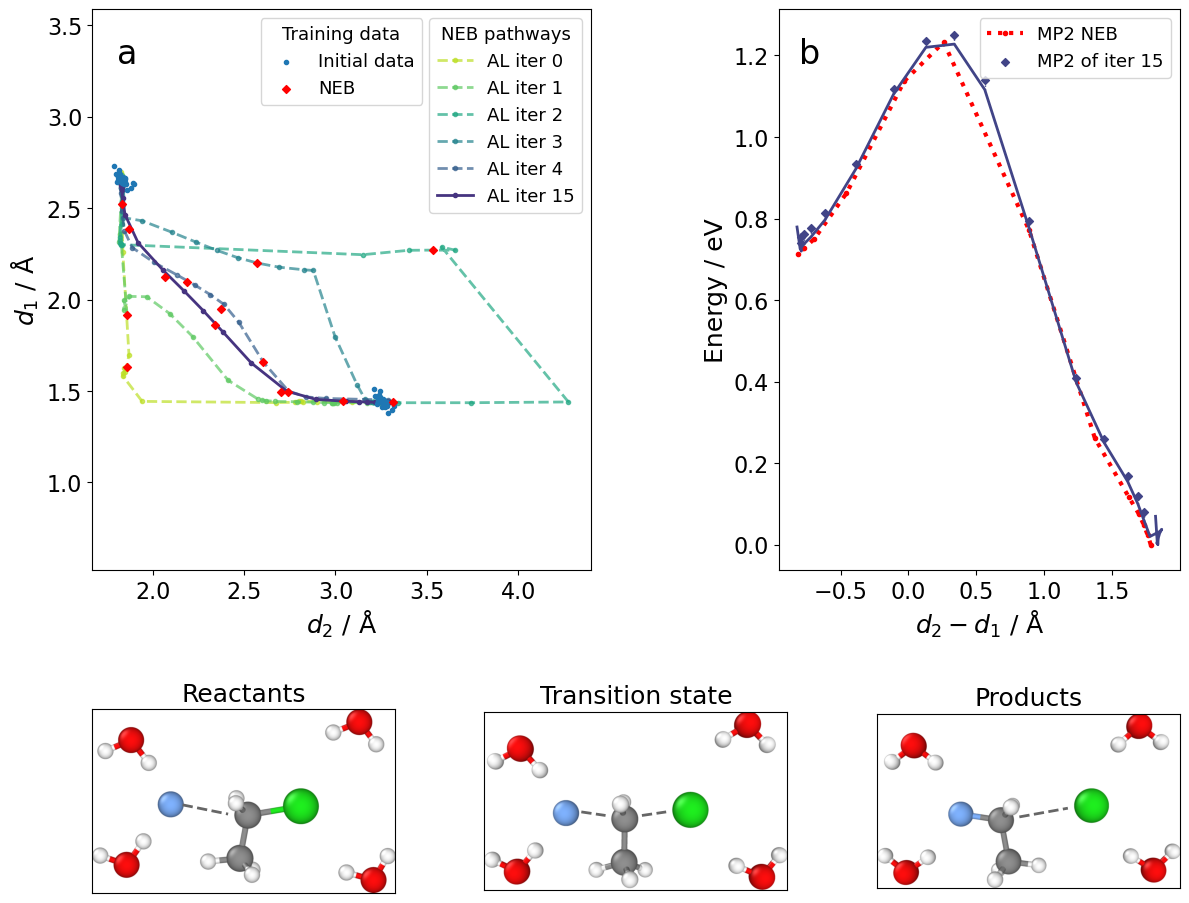

In [5]:
s = 12
m = 18
l = 14

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['legend.title_fontsize'] = 13

fig = plt.figure(layout='constrained', figsize=(12,10))

gs = GridSpec(10, 12, figure=fig)

ax1 = fig.add_subplot(gs[0:6, 0:6])
ax2 = fig.add_subplot(gs[0:6, 7:])

ax3 = fig.add_subplot(gs[6:10, 0:4])
ax4 = fig.add_subplot(gs[6:10, 4:8])
ax5 = fig.add_subplot(gs[6:10, 8:])

for ax in [ax3, ax4, ax5]:
    ax.set_xticks([])
    ax.set_yticks([])

display_mp2 = np.arange(16,32) #[0,2,4,6,7,8,9,10,11,12,13,15,17,19]

train_0 = read('../nofrozencore/1-images-train60-highest-dis-std-0.02-2-models/iter0/train.xyz', '5:')
d1d2 = np.array([list(d1_d2(atoms,  n=3, l=4, c=0)) for atoms in train_0])
d1 = d1d2[:,0]
d2 = d1d2[:,1]


ax2.plot(d2m-d1m, mp2_neb, c='red', marker='.', linestyle='dotted', label='MP2 NEB', zorder=0, linewidth=3)
#ax1.scatter(d2,d1, label='initial', marker='.')


cmap = get_cmap('viridis')
cm = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
cm.reverse()

ax1.set_ylim(1.4, 3.2)
ax1.set_xlim(1.4, 3.8)

lines = []

for i, c in zip([0,1,2,3,4,15], [0.9, 0.75, 0.6, 0.45, 0.3, 0.15]):
    neb = read(f'../nofrozencore/1-images-train60-highest-dis-std-0.02-2-models/iter{i}/neb.xyz', ':')
    d1d2 = np.array([list(d1_d2(atoms,  n=3, l=4, c=0)) for atoms in neb])
    d1 = d1d2[:,0]
    d2 = d1d2[:,1]
    if i != 15:
        ls = '--'
        alpha=0.7
    else:
        ls = 'solid'
        alpha=1
    lines += ax1.plot(d2,d1, label=f'AL iter {i}', zorder=0, c=cmap(c), ls=ls, alpha=alpha, marker='.', linewidth=2)

for i in [1]:
    iter = [0, 15]
    cm = [0.8, 0.2]
    neb = read(f'../nofrozencore/1-images-train60-highest-dis-std-0.02-2-models/iter{iter[i]}/neb.xyz', ':')
    d1d2 = np.array([list(d1_d2(atoms,  n=3, l=4, c=0)) for atoms in neb])
    d1 = d1d2[:,0]
    d2 = d1d2[:,1]
    if iter[i] != 15:
        ls = '--'
        alpha=0.7
    else:
        ls = 'solid'
        alpha=1
    print(mp2_energies-energies[i,:])
    for im in display_mp2:
        ax2.plot([(d2-d1)[im]]*2, [energies[i, im] - np.min(energies[i,:]), mp2_energies[i, im] - np.min(mp2_energies[i,:])],c=cmap(cm[i]), zorder=0, linewidth=1, ls='dotted')
    ax2.plot((d2-d1), (energies[i,:] - np.min(energies[i,:])), c=cmap(cm[i]), ls=ls, alpha=alpha, zorder=0, linewidth=2)
    ax2.scatter((d2-d1)[display_mp2], (mp2_energies[i,:] - np.min(mp2_energies[i,:]))[display_mp2], c=cmap(cm[i]), marker='D', s=16, zorder=1, label=f'MP2 of iter {iter[i]}')

#true_neb = np.array([at.get_potential_energy() for at in read('../ab-initio-neb/neb-run-from-neb1-lowest-im/neb-mp2.xyz', ':')])
#true_neb -= np.min(true_neb)

d1d2 = np.array([list(d1_d2(atoms,  n=3, l=4, c=0)) for atoms in neb])
d1 = d1d2[:,0]
d2 = d1d2[:,1]


ax1.set_ylabel('$d_1\ /\ \mathrm{\AA}$')
ax1.set_xlabel('$d_2\ /\ \mathrm{\AA}$')
ax1.axis("equal")
ax1.legend()

ax2.set_ylabel('Energy / eV')
ax2.set_xlabel('$d_2 - d_1 \ /\ \mathrm{\AA}$')

ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=24, verticalalignment='top', horizontalalignment='left')
ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=24, verticalalignment='top', horizontalalignment='left')

fname = "../nofrozencore/1-images-train60-highest-dis-std-0.02-2-models/iter15/train.xyz"
n_atom = 5
n_train = 60

configs = read(fname, ":")
initial = configs[n_atom : n_atom  + n_train]
neb_configs = configs[n_atom + n_train :]

d1i = []
d2i = []

for c in initial:
    d1, d2 = d1_d2(c, n=3, l=4, c=0)
    d1i.append(d1)
    d2i.append(d2)

d1n = []
d2n = []

for c in neb_configs:
    d1, d2 = d1_d2(c, n=3, l=4, c=0)
    d1n.append(d1)
    d2n.append(d2)

s1 = ax1.scatter(d2i, d1i, label="Initial data", marker=".")
s2 = ax1.scatter(d2n, d1n, label="NEB", marker="D", c='red', s=16)


ax1.legend()
ax1.set_aspect('equal')
ax1.set_ylabel('$d_1\ /\ \mathrm{\AA}$')
ax1.set_xlabel('$d_2\ /\ \mathrm{\AA}$')
ax2.legend()



legend1 = ax1.legend(handles=lines, loc=1, title='NEB pathways')
ax1.add_artist(legend1)
#legend2 = ax1.legend(handles=[s1], loc=5, title='Training data')
legend2 = ax1.legend(handles=[s1,s2], loc=9, title='Training data')

img = np.asarray(Image.open('../../figures/r.png'))
ax3.imshow(img)
ax3.set_title('Reactants')
img = np.asarray(Image.open('../../figures/ts.png'))
ax4.imshow(img)
ax4.set_title('Transition state')
img = np.asarray(Image.open('../../figures/p.png'))
ax5.imshow(img)
ax5.set_title('Products')

ax3.plot([0.3, 0.45], [0.48, 0.43], transform=ax3.transAxes, linewidth=2, color='#666666', ls='--')
ax4.plot([0.32, 0.4], [0.44, 0.42], transform=ax4.transAxes, linewidth=2, color='#666666', ls='--')
ax4.plot([0.52, 0.6], [0.42, 0.44], transform=ax4.transAxes, linewidth=2, color='#666666', ls='--')
ax5.plot([0.47, 0.63], [0.41, 0.46], transform=ax5.transAxes, linewidth=2, color='#666666', ls='--')


#ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=24, verticalalignment='top', horizontalalignment='left')
#ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=24, verticalalignment='top', horizontalalignment='left')


plt.tight_layout()
plt.savefig('../figures/solv-neb.pdf')

plt.show()

array([ 4.01154502e-04,  3.67948655e-01,  3.69556771e-01,  3.71593688e-01,
        3.65707959e-01,  3.64086353e-01,  3.55460780e-01,  3.49081940e-01,
        3.49051497e-01,  3.54050787e-01,  3.65338597e-01,  3.59686849e-01,
        3.55634455e-01,  3.72950089e-01,  3.76689053e-01,  4.99307927e-01,
        5.28084412e-01,  6.43371790e-01,  1.32106628e+00,  1.14512818e+00,
        1.13327334e+00,  1.43999454e+00,  1.83170857e+00,  3.83080805e+00,
        1.89248687e+00,  1.68392894e+00,  8.12848352e-01,  4.79590233e-01,
        4.12954383e-01,  3.68220644e-01,  2.92397752e-01,  1.43699860e-01,
        1.14854724e-01,  1.02080135e-01,  8.57456196e-02,  6.16567583e-02,
        3.58456580e-02,  1.33160308e-02, -1.42749159e-02,  1.07633189e-03])

In [11]:
neb = read('../nofrozencore/1-images-train60-highest-dis-std-0.02-2-models/iter0/neb-mp2.xyz', '1:-1')
mp2 = np.array([at.info['mp2_energy'] for at in neb])
mace = np.array([at.get_potential_energy() for at in neb])
err = np.absolute(mace-mp2)

In [12]:
np.max(err)

16.28504238122696

In [8]:
neb = read('../nofrozencore/1-images-train60-highest-dis-std-0.02-2-models/iter15/neb-mp2.xyz', '1:-1')
mp2 = np.array([at.info['mp2_energy'] for at in neb])
mace = np.array([at.get_potential_energy() for at in neb])
err = np.absolute(mace-mp2)

In [9]:
mp2[0] - mp2[-1]

-0.7517152404070657

In [23]:
np.max(mace) - mace[-1]

0.4988320201373426

In [24]:
np.where(err==np.max(err))

(array([5]),)

In [18]:
e = [at.info['mp2_energy'] for at in read('../nofrozencore/5-images-train60-highest-dis-std-0.04-4-models/iter0/neb-mp2.xyz', ':')]

In [15]:
f_mp2_neb = np.array([np.max(np.linalg.norm(at.get_forces())) for at in read('../ab-initio-neb/neb-run-from-neb1-lowest-im/neb-mp2.xyz', '1:-1')])

In [16]:
f_mp2_neb

array([0.11345525, 0.11850605, 0.1244643 , 0.13103323, 0.13798488,
       0.14517031, 0.15246618, 0.15976377, 0.16695737, 0.17398885,
       0.18092837, 0.18832517, 0.19919237, 0.2343195 , 0.4235941 ,
       0.93127664, 1.83057466, 2.64822029, 2.80443908, 2.46725315,
       1.8321799 , 1.04286182, 0.22077415, 0.58267875, 1.16478169,
       1.48614467, 1.43773138, 0.95515338, 0.43460498, 0.24237059,
       0.18455157, 0.15420874, 0.13020259, 0.11044827, 0.09537406,
       0.08397237, 0.07523875, 0.06873805])